# Jamar Sanders
DSC_530
Time Series Analysis
Prediction Model
Spotify 600K Database Hit Song Popularity over time 

# References:

GeeksforGeeks. (2025, January 16). Linear regression (Python implementation). Retrieved from https://www.geeksforgeeks.org/linear-regression-python-implementation/\n

Shewhart, W. A., & Wilks, S. S. (Eds.). (n.d.). Wiley series in probability and statistics. Wiley.\n",

Singh, H. (2024, December 20). 6 assumptions of linear regression. Retrieved from [https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/]\n"

Singh, J. (2022, December 28). How to perform an ANCOVA in Python? Tutorialspoint. Retrieved from https://www.tutorialspoint.com/how-to-perform-an-ancova-in-python#:~:text=ANCOVA%20is%20similar%20to%20ANOVA,more%20accurate%20comparisons%20between%20groups

 Notebook Structure (Outline)
00_data_acquisition.ipynb
Connect to Spotify API + enrich dataset

Connect to Instagram Graph API to collect post data

Save cleaned data to .csv or .pkl

01_eda_instagram.ipynb
Distribution of likes, comments, post types

Engagement vs hashtags, image filters, posting time

Correlation matrix

Heatmaps, violin plots

02_eda_spotify.ipynb
Top genres, artist diversity, average track duration

Relationship between genre and demographics

Sentiment of lyrics (optional)

Dimensionality reduction (PCA)

03_modeling_users.ipynb
Clustering users (KMeans, DBSCAN)

Predicting user traits (classification/regression)

Feature importance (Random Forests, SHAP)

04_report.ipynb
Summary visualizations

Target demographic personas

Strategic recommendations

 # Research Questions (RQs)

Research Question Platform Approach

1	What patterns exist in Instagram post features that lead to high engagement?

	Instagram	EDA + regression/classification

2	How do Spotify playlist/song attributes align with demographic or personality traits?	

Spotify	EDA + clustering + predictive modeling

3	Can we cluster users from both platforms to identify target market segments?

	Both	Merge insights + PCA/t-SNE + clustering


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, mean_squared_error
import shap

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/merged_data.csv')


In [3]:
print(df.columns.tolist())

['id_x', 'followers', 'genres', 'name_x', 'popularity_x', 'id_y', 'name_y', 'popularity_y', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [4]:
df_clean = df.dropna()

In [5]:
print(df.shape)
print(df.dropna().shape)  # This tells us how many rows remain after cleaning


(0, 25)
(0, 25)


In [6]:
import pandas as pd
import json

# Load data
df_tracks = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv')
df_artists = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/artists.csv')

with open('/workspaces/Hit_Song_Prediction_Model/dict_artists.json', 'r') as f:
    dict_artists = json.load(f)

In [7]:
import pandas as pd
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/merged_data.csv')

In [ ]:
print(df.columns.tolist())

['id_x', 'followers', 'genres', 'name_x', 'popularity_x', 'id_y', 'name_y', 'popularity_y', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


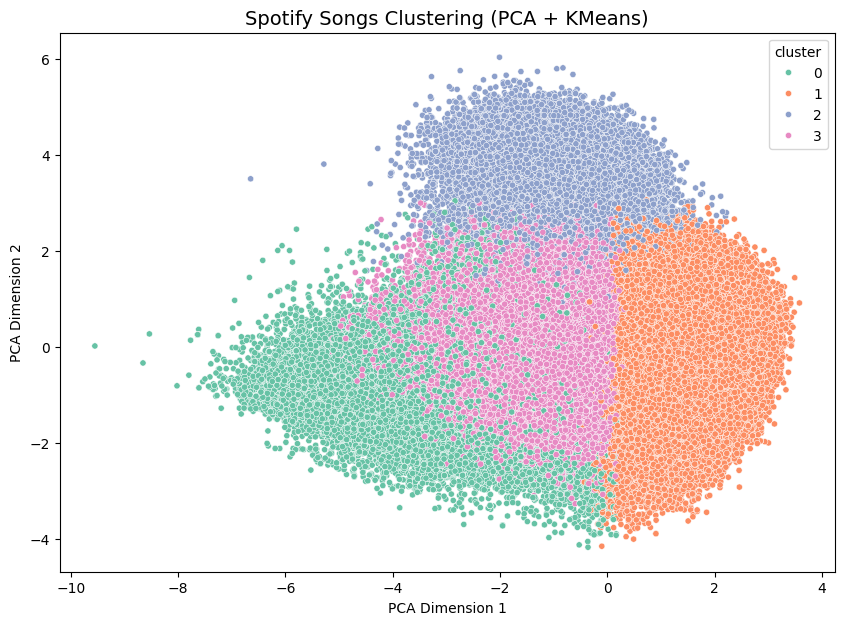

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv')

# Features to use
features = [
    'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 
    'valence', 'tempo'
]

# Drop rows with missing data in those columns
df_clean = df[features].dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# PCA (faster than t-SNE)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add PCA and cluster results to main DataFrame
df_vis = df.loc[df_clean.index].copy()
df_vis['pca-1'] = X_pca[:, 0]
df_vis['pca-2'] = X_pca[:, 1]
df_vis['cluster'] = clusters

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_vis, x='pca-1', y='pca-2', hue='cluster', palette='Set2', s=20)
plt.title('Spotify Songs Clustering (PCA + KMeans)', fontsize=14)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()


In [10]:
# Describe average characteristics of each cluster
cluster_summary = df_vis.groupby('cluster')[features].mean().round(3)
print(cluster_summary)


         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0               0.425   0.281   -16.897        0.058         0.802   
1               0.619   0.722    -7.334        0.080         0.215   
2               0.664   0.403   -15.332        0.851         0.634   
3               0.498   0.339   -12.302        0.055         0.711   

         instrumentalness  liveness  valence    tempo  
cluster                                                
0                   0.801     0.185    0.387  108.709  
1                   0.057     0.214    0.652  124.990  
2                   0.005     0.389    0.564  102.381  
3                   0.022     0.198    0.433  112.737  


In [ ]:
df_clean = df_clean.sample(n=568000, random_state=42)

/tmp/ipykernel_3217/1263855087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_vis, x='cluster', y='valence', palette='Set2')


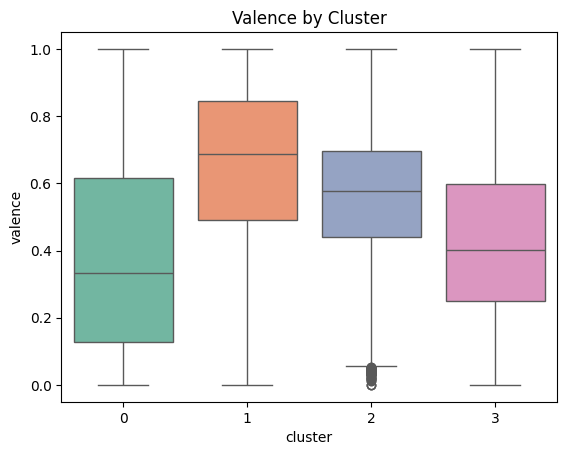

In [12]:
# Plot valence distribution per cluster
sns.boxplot(data=df_vis, x='cluster', y='valence', palette='Set2')
plt.title('Valence by Cluster')
plt.show()

In [13]:
# Extract first artist from id_artists column (assuming the column contains actual lists)
df_vis['main_artist_id'] = df_vis['id_artists'].apply(lambda x: x[0] if isinstance(x, list) else None)

# Merge with artists to get artist names
df_merged = df_vis.merge(df_artists, left_on='main_artist_id', right_on='id', how='left')


In [14]:
df_merged = df_merged.rename(columns={'name': 'artist_name'})

In [15]:
# Inspect the first few rows of the merged dataframe
df_merged.head()

,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,time_signature,pca-1,pca-2,cluster,main_artist_id,id_y,followers,genres,name_y,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,3,-1.929926,0.686922,0,None,NaN,NaN,NaN,NaN,NaN
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,-1.894876,4.389878,2,None,NaN,NaN,NaN,NaN,NaN
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,5,-2.673761,0.198141,3,None,NaN,NaN,NaN,NaN,NaN
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,3,-4.403877,-1.143507,0,None,NaN,NaN,NaN,NaN,NaN
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,4,-2.950273,-0.197841,3,None,NaN,NaN,NaN,NaN,NaN


In [16]:
# Check column names of the merged dataframe
df_merged.columns


Index(['id_x', 'name_x', 'popularity_x', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'pca-1', 'pca-2',
       'cluster', 'main_artist_id', 'id_y', 'followers', 'genres', 'name_y',
       'popularity_y'],
      dtype='object')

In [17]:
# Drop rows with missing artist names in the 'name_x' column (or 'name_y' if needed)
df_merged = df_merged.dropna(subset=['name_x'])

In [18]:
import pandas as pd

# Load the artists.csv file
df_artists = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/artists.csv')

# Print column names
print(df_artists.columns.tolist())

['id', 'followers', 'genres', 'name', 'popularity']


In [17]:
pip install shap

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/__main__.py", line 22, in <module>
    from pip._internal.cli.main import main as _main
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.metadata import get_default_environmen

In [19]:
import os
print(os.listdir())  # This will list all files in the current directory

['.vscode', 'Hit_Song_Prediction_Model.docx', 'dict_artists.json', '.git', 'merged_data.csv', 'artists.csv', 'tracks.csv', 'jkjn.ipynb']


In [20]:
print(df_clean.columns)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')


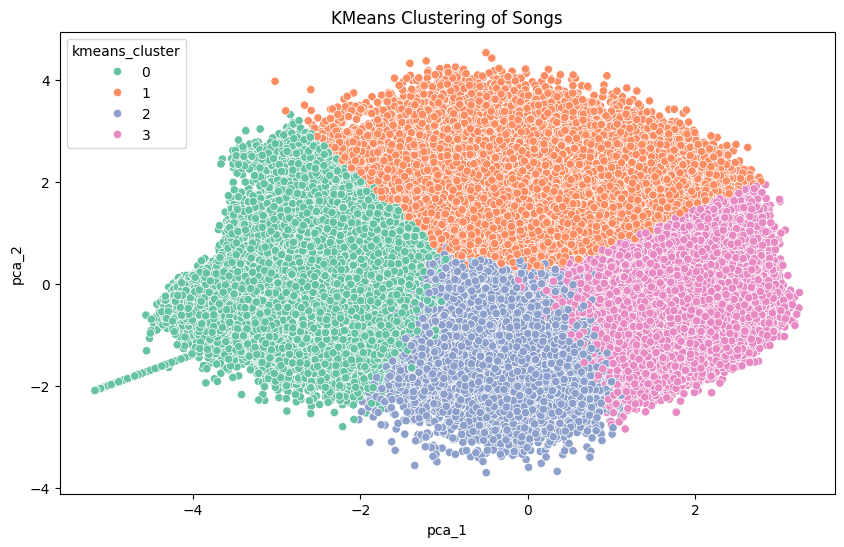

In [21]:
# Select only rows where clustering features are not null
features_for_clustering = ['danceability', 'energy', 'valence', 'tempo']
df_cluster = df[features_for_clustering].dropna()

# Scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Merge cluster labels back into the original DataFrame
df_clustered = df.loc[df_cluster.index].copy()
df_clustered['kmeans_cluster'] = clusters

# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_clustered['pca_1'] = pca_result[:, 0]
df_clustered['pca_2'] = pca_result[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clustered, x='pca_1', y='pca_2', hue='kmeans_cluster', palette='Set2')
plt.title('KMeans Clustering of Songs')
plt.show()


In [22]:
print(df_clean.columns)


Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')


In [23]:
print(df_clean.columns.tolist())

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


In [24]:
correlation_matrix = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
print(correlation_matrix)


                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.241563  0.251436     0.199310     -0.242951   
energy                0.241563  1.000000  0.764735    -0.053506     -0.715412   
loudness              0.251436  0.764735  1.000000    -0.167112     -0.519423   
speechiness           0.199310 -0.053506 -0.167112     1.000000      0.069060   
acousticness         -0.242951 -0.715412 -0.519423     0.069060      1.000000   
instrumentalness     -0.225900 -0.195839 -0.329306    -0.102440      0.204412   
liveness             -0.106168  0.124632  0.029529     0.207047     -0.004738   
valence               0.528150  0.372276  0.275448     0.046501     -0.180939   
tempo                -0.040783  0.230099  0.189288    -0.086911     -0.195235   

                  instrumentalness  liveness   valence     tempo  
danceability             -0.225900 -0.106168  0.528150 -0.040783  
energy                   -0.195839  0.124632  0.372276 

In [25]:
df = pd.read_csv("/workspaces/Hit_Song_Prediction_Model/tracks.csv", parse_dates=['release_date'])  # if a time column exists
print(df.dtypes)
print(df.head())
print(df.describe())

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object
                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e           

In [26]:
import pandas as pd

# Load the dataset and parse the date column
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv', parse_dates=['release_date'])

# Confirm the data type
print(df.dtypes['release_date'])

# Display first 5 rows
print(df[['release_date']].head())


: 

In [29]:
# Re-parse with error handling
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Drop rows where release_date couldn't be parsed
df = df.dropna(subset=['release_date'])

# Confirm it worked
print(df.dtypes['release_date'])  # Should now show datetime64[ns]
print(df['release_date'].head())


datetime64[ns]
0   1922-02-22
1   1922-06-01
2   1922-03-21
3   1922-03-21
9   1922-03-29
Name: release_date, dtype: datetime64[ns]


/tmp/ipykernel_1977/3763333303.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['popularity'].resample('M').mean()


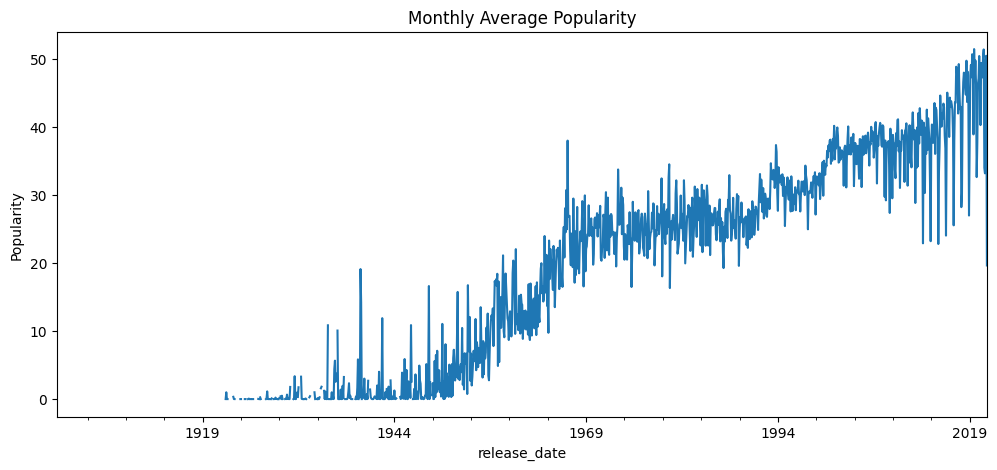

In [30]:
# Set datetime column as index
df = df.set_index('release_date').sort_index()

# Resample monthly and compute mean popularity
monthly_data = df['popularity'].resample('M').mean()

# Plot it
import matplotlib.pyplot as plt
monthly_data.plot(title='Monthly Average Popularity', figsize=(12, 5))
plt.ylabel('Popularity')
plt.show()

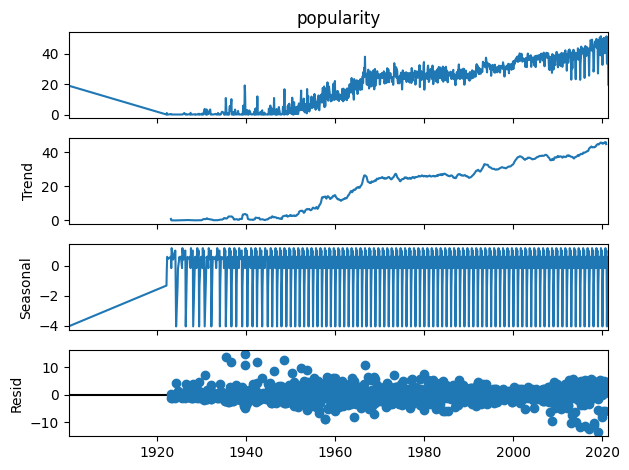

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Drop missing values
monthly_data = monthly_data.dropna()

# Decompose the time series with a 12-month seasonality
decomposition = seasonal_decompose(monthly_data, model='additive', period=12)

# Plot
decomposition.plot()
plt.tight_layout()
plt.show()

In [32]:
# Set the frequency for DatetimeIndex
monthly_data.index = monthly_data.index.to_period('M').to_timestamp()

In [ ]:
from flask import Flask, request, jsonify
from keras.models import load_model

app = Flask(__name__)
model = load_model('hit_song_model.h5')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Expecting JSON input
    prediction = model.predict(data['features'])
    return jsonify({'hit_probability': prediction[0][0]})